In [6]:
import numpy as np
import pandas as pd
data = pd.read_csv('OnlineRetail (3).csv',encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<h1 style="font-family:Palatino;color:deepskyblue;"> Online Retail </h1>
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.
<h3 style="font-family:Helvetica;color:darkblue;">Objective of the Project</h3>
<ol>
    <li> come up with useful insights that can be used by each of the stores to improve in various areas. </li>
    <li> Forecast the sales for each store for the next 12 weeks. </li>
</ol>


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
from pandas_profiling import ProfileReport
Report = ProfileReport(data)
Report.to_file(output_file='retail.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [9]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [11]:
first_date = data['InvoiceDate'].min()
last_date = data['InvoiceDate'].max()

print('First date:', first_date)
print('Last date:', last_date)

First date: 2010-12-01 08:26:00
Last date: 2011-12-09 12:50:00


In [12]:
data.Country.nunique()

38

In [13]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

<h3 style="font-family:Helvetica;color:darkblue;">Data Description</h3>
<p>The <strong>Online Retail</strong> dataset contains transactional data of a UK-based online retail store between December 1, 2010, and December 9, 2011. The dataset includes 8 columns: <strong>'InvoiceNo'</strong>, <strong>'StockCode'</strong>, <strong>'Description'</strong>, <strong>'Quantity'</strong>, <strong>'InvoiceDate'</strong>, <strong>'UnitPrice'</strong>, <strong>'CustomerID'</strong>, and <strong>'Country'</strong>. and The dataset has <strong>541909 </strong>entries,There are 38 unique countries represented in the dataset</p>

<h3 style="font-family:Helvetica;color:darkblue;">Data Pre-processing</h3>

In [14]:
#There are a small number of null values in the 'Description' column, so we can remove that column.
data.dropna(inplace=True)

In [15]:
data.duplicated().sum()

5225

In [16]:
data.shape

(406829, 8)

In [17]:
#Duplicate rows can be caused by entry errors or other issues and may affect the accuracy and reliability of data analysis.
#Removing duplicate rows can improve the quality of the data and prevent skewed results.
data.drop_duplicates(inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [19]:
data.CustomerID = data.CustomerID.astype('str')

In [20]:
monthly_sales = data.groupby(["Country", pd.Grouper(key="InvoiceDate", freq="M")])["Quantity"].sum().reset_index()
monthly_sales.rename(columns={"Quantity": "Monthly Sales"}, inplace=True)

monthly_sales_c = monthly_sales.groupby("Country")["Monthly Sales"].mean()
monthly_sales_c

Country
Australia                 6970.250000
Austria                    438.818182
Bahrain                    260.000000
Belgium                   1780.923077
Brazil                     356.000000
Canada                     552.600000
Channel Islands            789.416667
Cyprus                     629.600000
Czech Republic             148.000000
Denmark                    744.363636
EIRE                     10475.923077
European Community         165.666667
Finland                    888.833333
France                    8446.615385
Germany                   9026.230769
Greece                     311.200000
Iceland                    351.142857
Israel                     797.400000
Italy                      615.307692
Japan                     1939.846154
Lebanon                    386.000000
Lithuania                  652.000000
Malta                      236.000000
Netherlands              15394.461538
Norway                    1924.700000
Poland                     332.090909
Port

In [21]:
monthly_sales_c.nlargest(5)

Country
United Kingdom    307297.692308
Netherlands        15394.461538
EIRE               10475.923077
Germany             9026.230769
France              8446.615385
Name: Monthly Sales, dtype: float64

In [22]:
monthly_sales_c.nsmallest(3)

Country
Saudi Arabia           37.500000
Czech Republic        148.000000
European Community    165.666667
Name: Monthly Sales, dtype: float64

<AxesSubplot:xlabel='Country', ylabel='Monthly Sales'>

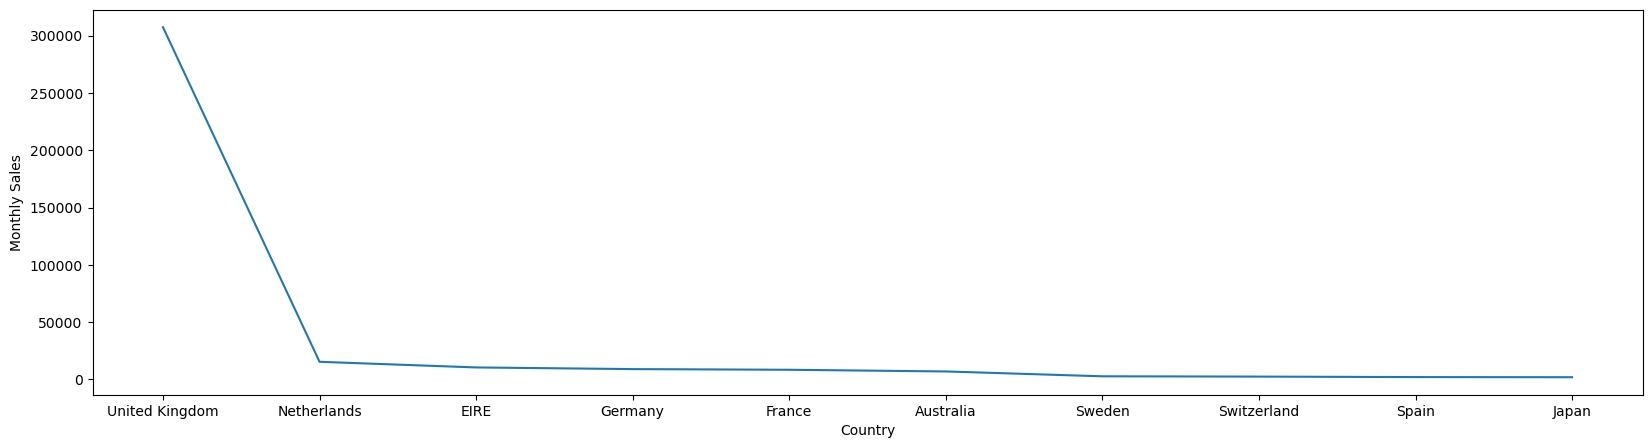

In [23]:
plt.figure(figsize=(20,5))
top10 = monthly_sales_c.nlargest(10)
sns.lineplot(x=top10.index,y=top10)

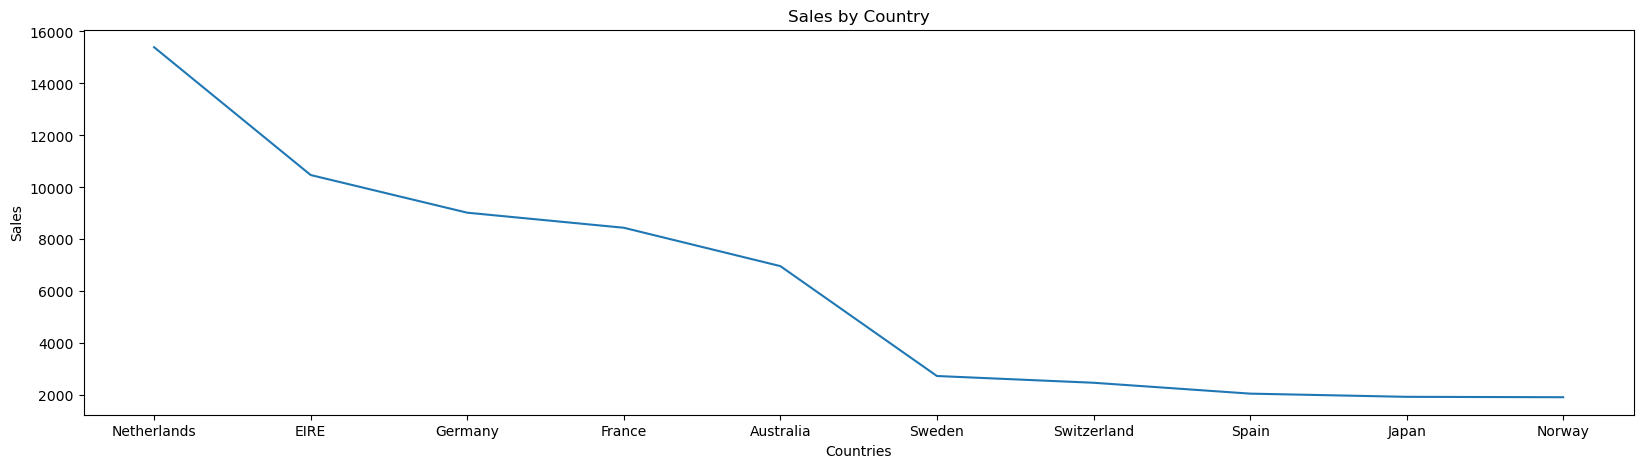

In [24]:
top_11_countries = monthly_sales_c.nlargest(11)
top_10_countries = top_11_countries.iloc[1:]  # Remove the first row united kingkdom

plt.figure(figsize=(20, 5))
sns.lineplot(x=top_10_countries.index, y=top_10_countries)
plt.xlabel('Countries')
plt.ylabel('Sales')
plt.title('Sales by Country')
plt.show()

<h4 style="font-family:Helvetica;color:maroon;">Insights</h4>
<ul>
    <li><strong>United Kingdom</strong> has the highest monthly sales, indicating that it is the most important market for the business.</li>
    <li><strong>Germany</strong>, <strong>France</strong>, <strong>Netherlands</strong>, and <strong>EIRE</strong> have high monthly sales, telling that these countries are also important markets for the business.</li>
    <li>Some countries have very low monthly sales, such as <strong>Saudi Arabia</strong>, <strong>Czech Republic</strong>, and <strong>Bahrain</strong>, which tells that these markets are not as important or may require further analysis to understand why sales are low.</li>
</ul>

In [25]:
most_selled_item = data.groupby('StockCode')['Quantity'].sum()
most_selled_item = most_selled_item.nlargest(25)

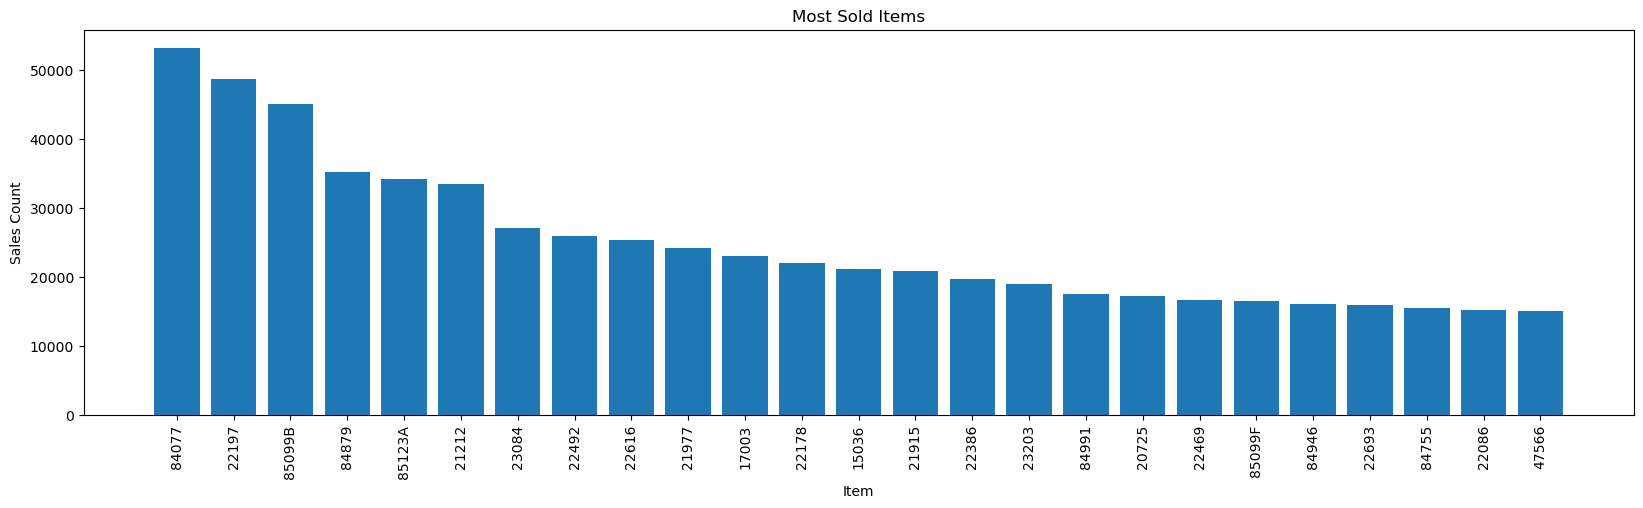

In [26]:
plt.figure(figsize=(20, 5))
plt.bar(x=most_selled_item.index, height=most_selled_item)
plt.xlabel('Item')
plt.ylabel('Sales Count')
plt.title('Most Sold Items')
plt.xticks(rotation=90)
plt.show()


In [27]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [28]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['revenue'] = data['Quantity'] * data['UnitPrice']

In [29]:
revenue_by_year = data.groupby('Year')['revenue'].sum() 

In [30]:
revenue_by_year

Year
2010     552372.860
2011    7726146.564
Name: revenue, dtype: float64

In [83]:
revenue_by_month=data.groupby('Month')['revenue'].sum()

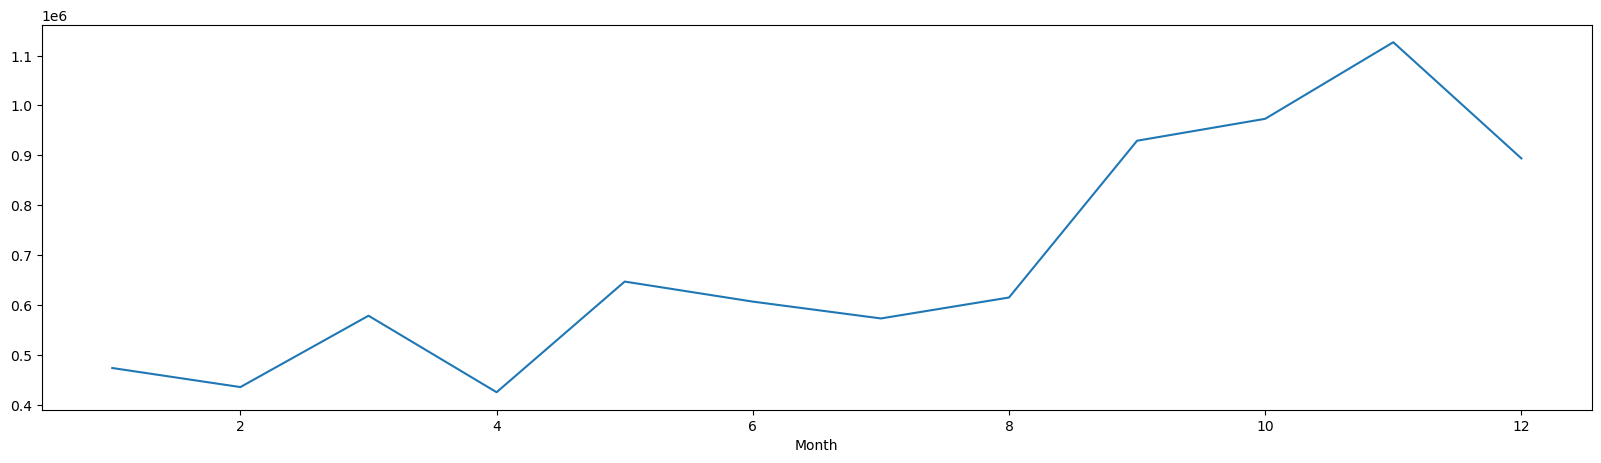

In [87]:
revenue_by_month.plot(figsize=(20,5))
plt.show()

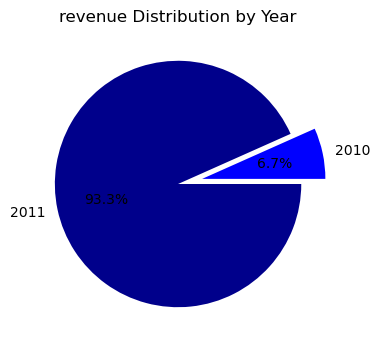

In [31]:
labels = revenue_by_year.index.astype(str)
colors = ['blue', 'darkblue']

explode = [0.2, 0]
plt.figure(figsize=(4, 4))
plt.pie(revenue_by_year, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('revenue Distribution by Year')
plt.show()

In [32]:
df = data.copy()

In [33]:
customer_data = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'InvoiceNo': 'nunique',
    'revenue' : 'sum'
}).reset_index()

customer_data_sorted = customer_data.sort_values('revenue', ascending=False)
customer_data_sorted.head()

,CustomerID,Quantity,UnitPrice,InvoiceNo,revenue
1703,14646.0,196719,2.590029,77,279489.02
4233,18102.0,64122,11.916236,62,256438.49
3758,17450.0,69009,9.463114,55,187322.17
1895,14911.0,77155,5.260307,248,132458.73
55,12415.0,77242,3.213136,26,123725.45


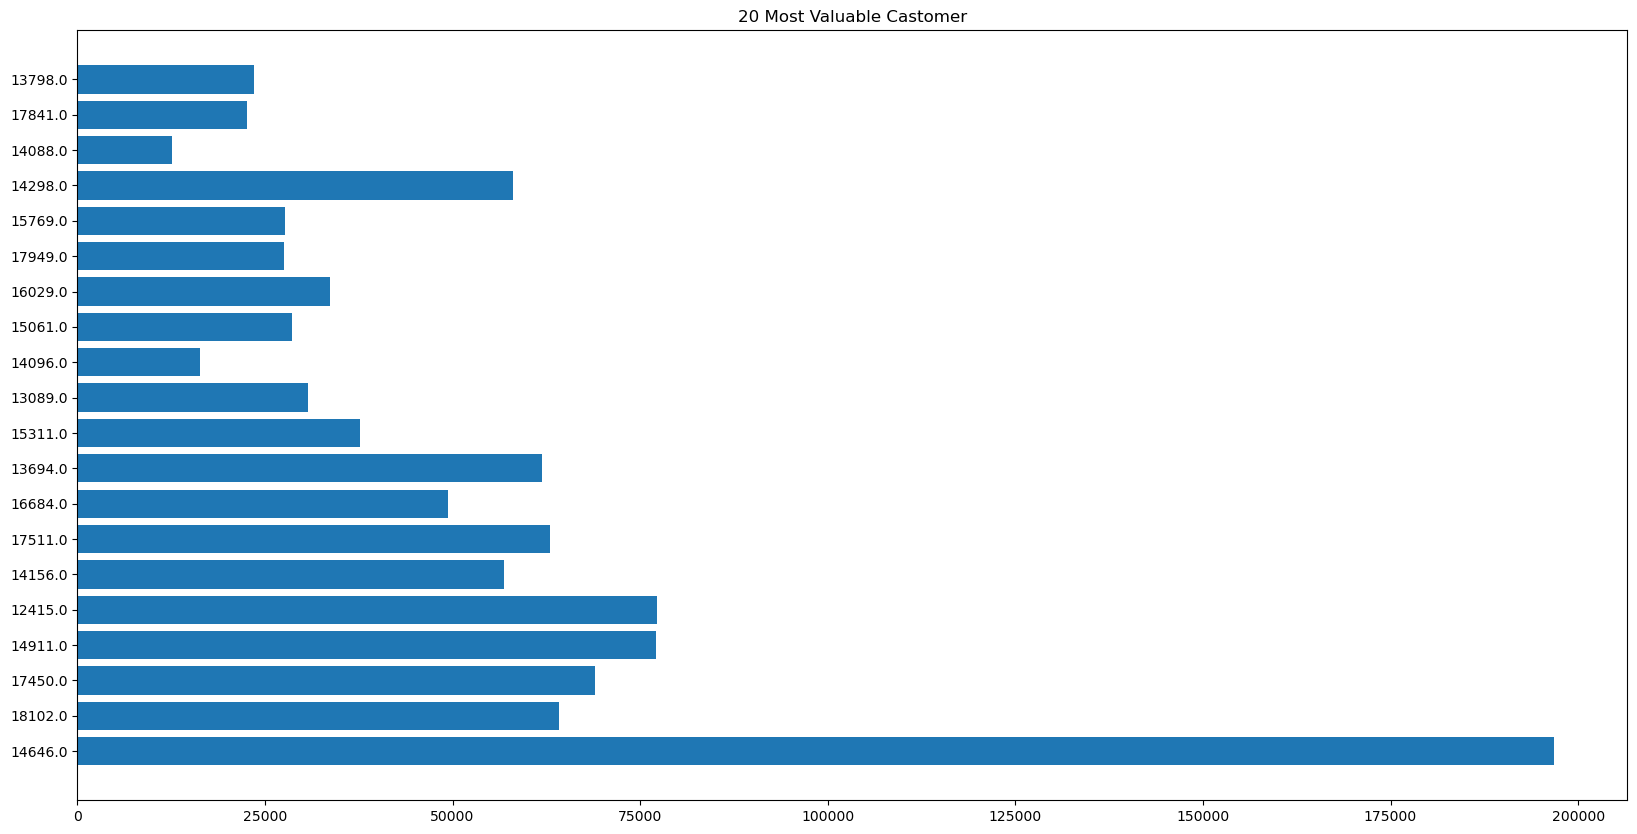

In [34]:
plt.figure(figsize=(20,10))
customer_data_sorted_20 = customer_data_sorted.head(20)
plt.barh(width=customer_data_sorted_20.Quantity, y=customer_data_sorted_20.CustomerID)
plt.title('20 Most Valuable Castomer')
plt.show()

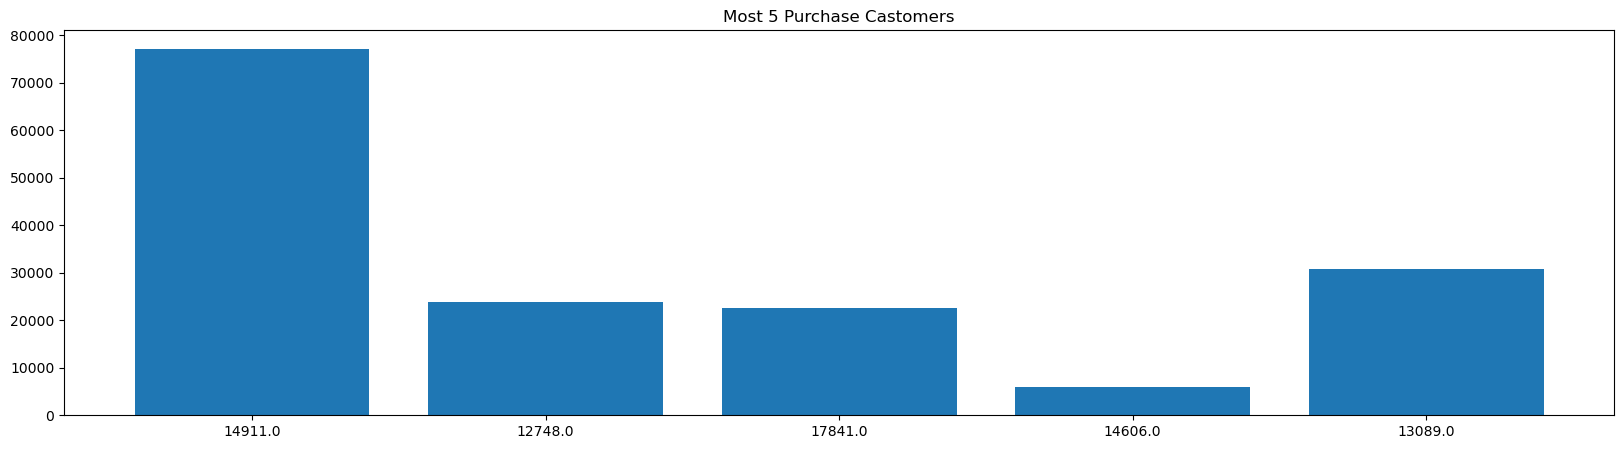

In [35]:
customer_data_sorted = customer_data.sort_values('InvoiceNo', ascending=False)
plt.figure(figsize=(20,5))
customer_data_sorted_20 = customer_data_sorted.head(5)
plt.bar(height=customer_data_sorted_20.Quantity, x=customer_data_sorted_20.CustomerID)
plt.title('Most 5 Purchase Castomers')
plt.show()

### purchasing behavior.

In [36]:
#Recency 
max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [57]:
data['Date_Diff'] = max_date - data['InvoiceDate']
data['Date_Diff'] = data['Date_Diff'].dt.days
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,revenue,Date_Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,373


In [58]:
customer_data = data.groupby('CustomerID').agg({
    'Date_Diff' : 'min',
    'InvoiceNo': 'nunique',
    'revenue' : 'sum'
}).reset_index()

In [59]:
customer_data.head()

,CustomerID,Date_Diff,InvoiceNo,revenue
0,12346.0,325,2,0.00
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [60]:
customer_data.columns = ['CustomerID', 'Recency', 'Frequency', 'revenue']
customer_data.head()

,CustomerID,Recency,Frequency,revenue
0,12346.0,325,2,0.00
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


<p> Finding and removing outliers is important as they can skew our data and potentially impact the performance of our models<p>

In [61]:
fig = sp.make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=customer_data['revenue']), row=1, col=1)
fig.add_trace(go.Box(y=customer_data['Frequency']), row=1, col=2)
fig.add_trace(go.Box(y=customer_data['Recency']), row=1, col=3)

fig.update_layout(height=400, width=900, title_text="Customer Data Box Plots")
fig.show()

In [62]:
# Removing outliers
Q1 = customer_data.revenue.quantile(0.05)
Q3 = customer_data.revenue.quantile(0.95)
IQR = Q3 - Q1
customer_data = customer_data[(customer_data.revenue >= Q1 - 1.5*IQR) & (customer_data.revenue <= Q3 + 1.5*IQR)]

Q1 = customer_data.Recency.quantile(0.05)
Q3 = customer_data.Recency.quantile(0.95)
IQR = Q3 - Q1
customer_data = customer_data[(customer_data.Recency >= Q1 - 1.5*IQR) & (customer_data.Recency <= Q3 + 1.5*IQR)]

Q1 = customer_data.Frequency.quantile(0.05)
Q3 = customer_data.Frequency.quantile(0.95)
IQR = Q3 - Q1
customer_data = customer_data[(customer_data.Frequency >= Q1 - 1.5*IQR) & (customer_data.Frequency <= Q3 + 1.5*IQR)]

<h1 style="font-family:Palatino;color:deepskyblue;"> Kmeans Clustring </h1>

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [64]:
# normalising
customer_data_df = customer_data[['revenue', 'Frequency', 'Recency']]
scaler = StandardScaler()
customer_data_df_scaled = scaler.fit_transform(customer_data_df)
customer_data_df_scaled.shape

(4294, 3)

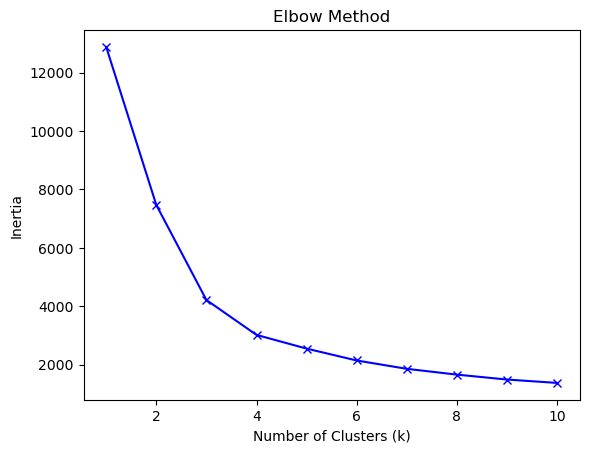

In [65]:
# Determine the Optimal Number of Clusters using the Elbow Method
inertia = []
k_values = range(1, 11) 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Based on the analysis, we have determined that the optimal number of clusters are 2 or 3. This conclusion was reached by performing the silhouette_score evaluation method.

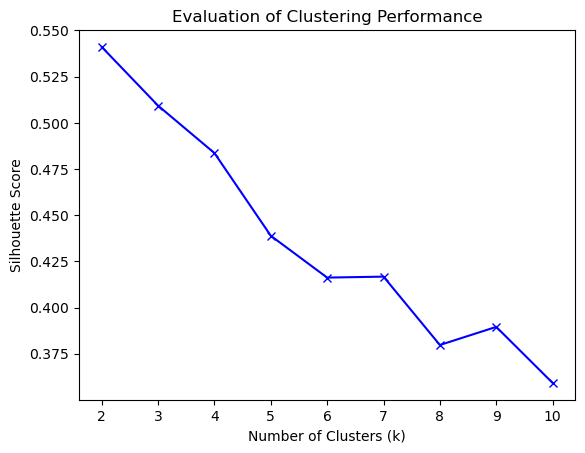

In [68]:
from sklearn.metrics import silhouette_score

scores = []
k_values = range(2, 11) 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_df_scaled)
    score = silhouette_score(customer_data_df_scaled, kmeans.labels_)
    scores.append(score)

plt.plot(k_values, scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Evaluation of Clustering Performance')
plt.show()

In [69]:
#2 is the best number of cluseters but i am tahking 3 clusturs 
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(customer_data_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [70]:
 kmeans.labels_

array([1, 0, 2, ..., 2, 0, 2])

In [71]:
customer_data['kmeans_labels'] = kmeans.labels_

In [72]:
customer_data.head()

,CustomerID,Recency,Frequency,revenue,kmeans_labels
0,12346.0,325,2,0.00,1
1,12347.0,1,7,4310.00,0
2,12348.0,74,4,1797.24,2
3,12349.0,18,1,1757.55,2
4,12350.0,309,1,334.40,1


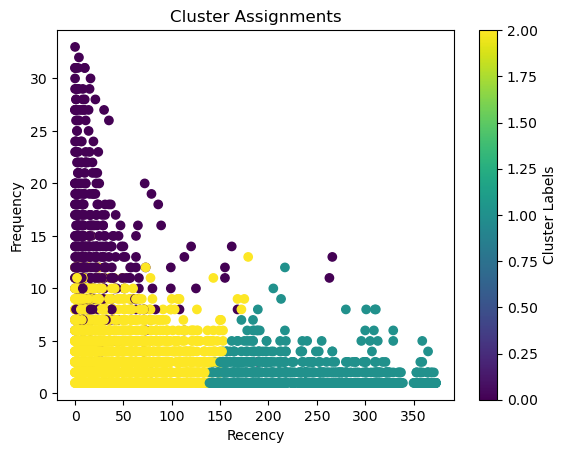

In [73]:
import matplotlib.pyplot as plt

# Scatter plot of 'Recency' vs. 'Frequency' colored by cluster labels
plt.scatter(customer_data['Recency'], customer_data['Frequency'], c=customer_data['kmeans_labels'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Cluster Assignments')
plt.colorbar(label='Cluster Labels')
plt.show()

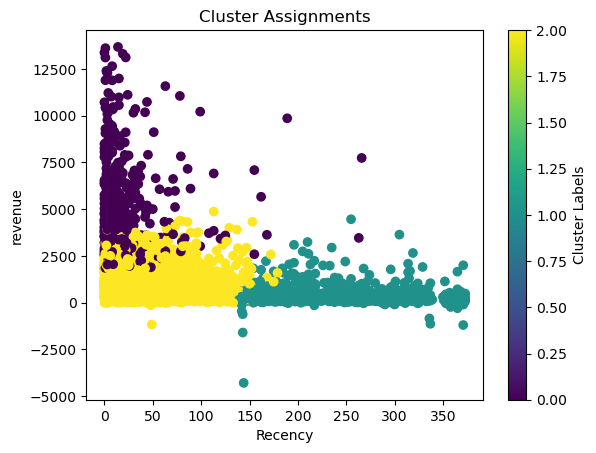

In [74]:
plt.scatter(customer_data['Recency'], customer_data['revenue'], c=customer_data['kmeans_labels'])
plt.xlabel('Recency')
plt.ylabel('revenue')
plt.title('Cluster Assignments')
plt.colorbar(label='Cluster Labels')
plt.show()

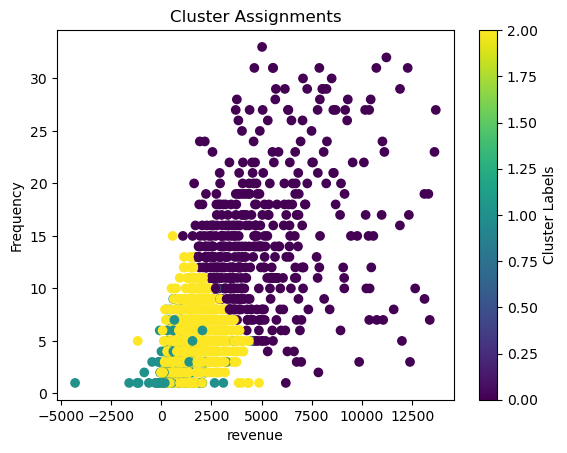

In [76]:
plt.scatter(customer_data['revenue'], customer_data['Frequency'], c=customer_data['kmeans_labels'])
plt.xlabel('revenue')
plt.ylabel('Frequency')
plt.title('Cluster Assignments')
plt.colorbar(label='Cluster Labels')
plt.show()

<h3 style="font-family:Helvetica;color:darkblue;">Time Series</h3>

Predicting the next 12 weeks' quantity offers valuable insights for inventory management and production planning. By accurately forecasting the expected quantity, businesses can optimize their stock levels, streamline operations, minimize stockouts, and improve customer satisfaction. This proactive approach helps reduce costs, enhance efficiency, and make informed decisions based on future demand patterns.

In [100]:
data_groupby = data[["InvoiceNo", "InvoiceDate", "Country", "Quantity"]].groupby(["InvoiceNo", "InvoiceDate", "Country"]).sum().reset_index()
data_groupby.index = data_groupby["InvoiceDate"]
data_groupby = data_groupby.drop(["InvoiceDate", "InvoiceNo"], axis=1)

In [101]:
data_groupby.head()

,Country,Quantity
InvoiceDate,,
2010-12-01 08:26:00,United Kingdom,40
2010-12-01 08:28:00,United Kingdom,12
2010-12-01 08:34:00,United Kingdom,83
2010-12-01 08:34:00,United Kingdom,15
2010-12-01 08:35:00,United Kingdom,3


In [102]:
#taking UK then need not country colum
df = data_groupby[data_groupby["Country"]=="United Kingdom"]
df = df.drop("Country", axis=1)
df.head()

,Quantity
InvoiceDate,
2010-12-01 08:26:00,40
2010-12-01 08:28:00,12
2010-12-01 08:34:00,83
2010-12-01 08:34:00,15
2010-12-01 08:35:00,3


In [103]:
#removing neg values missing values form df 
df = df['2011':]
df = df[df.Quantity >=0]
df = df.resample('W').sum()
df.head()

,Quantity
InvoiceDate,
2011-01-09,59187
2011-01-16,53875
2011-01-23,110061
2011-01-30,45167
2011-02-06,57837


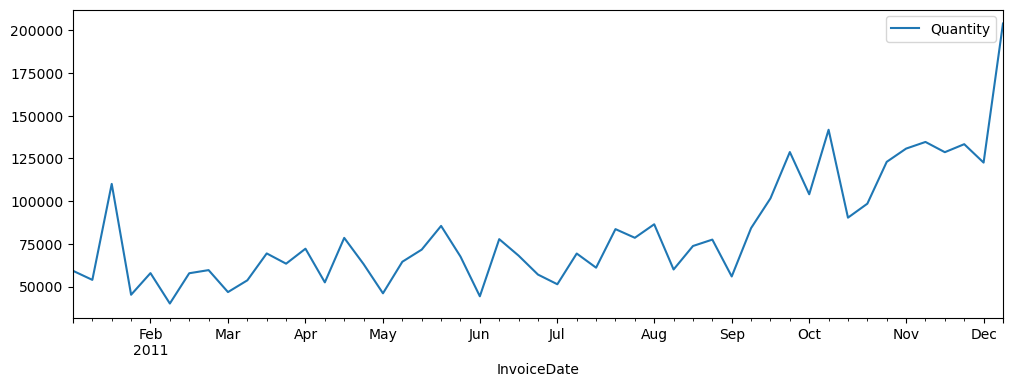

In [104]:
df.plot(figsize=(12,4))
plt.show()

<p> The plot shows a change in mean over time, which indicates that the data is <strong> not stationary </strong>  I need to convert this into <strong> stationary </strong> in order to make accurate forecasts.</p> 

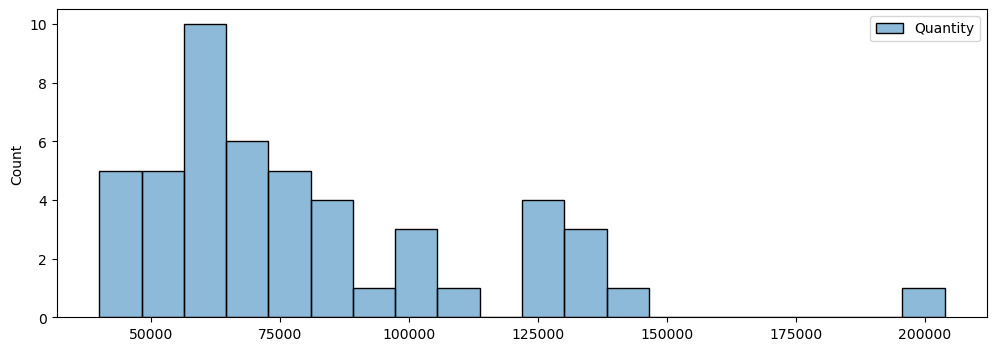

In [105]:
plt.figure(figsize=(12,4))
sns.histplot(df,bins=20)
plt.show()

<h4> Rolling </h4>

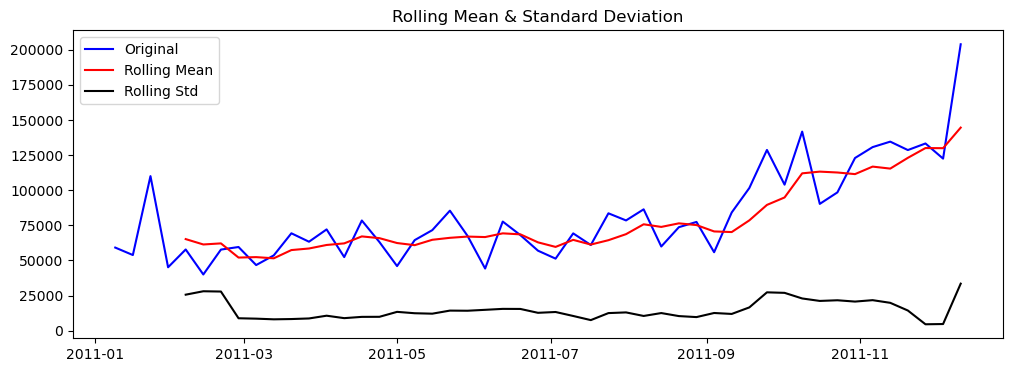

Results of Dickey-Fuller Test:
Test Statistic                  1.075580
p-value                         0.995003
#Lags Used                      3.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


In [106]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5,center=False).mean() 
    rolstd = timeseries.rolling(window=5,center=False).std()
    #Plot rolling statistics:
    plt.figure(figsize=(12,4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df)

 <p>we can seen in this graph this is not stationary also The Dickey-Fuller test statistic is positive and the p-value is greater than <strong>0.05 </strong>, which indicates weak evidence against the <strong>null hypothesis(non stationarity) </strong>. Therefore, this is non stationary. </p>

<h3 style="font-family:Helvetica;color:Green;">Convert Data Into Stationary Data</h3>

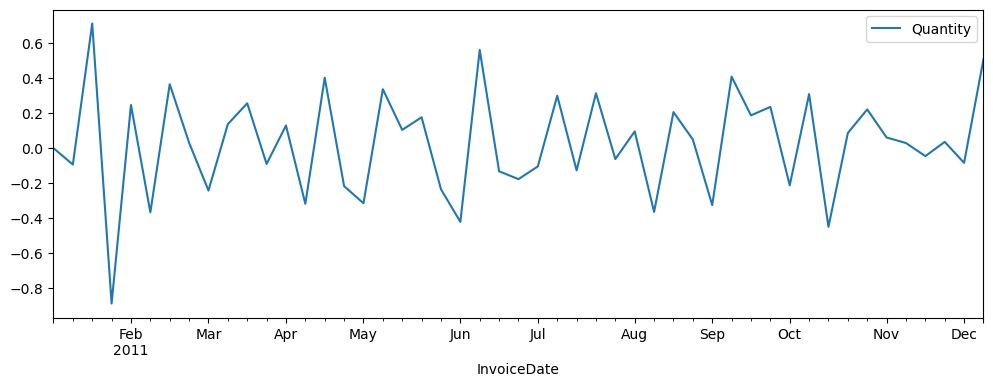

In [107]:
#taking log for making stationary 
df_log = np.log(df + 1e-8) # add a small constant to avoid zero or negative values)
df_log_diff = df_log - df_log.shift()
df_log_diff = df_log_diff.fillna(1e-8)
df_log_diff.plot(figsize=(12,4))
plt.show()

##### Dickey Fuller Test On Transformed Data

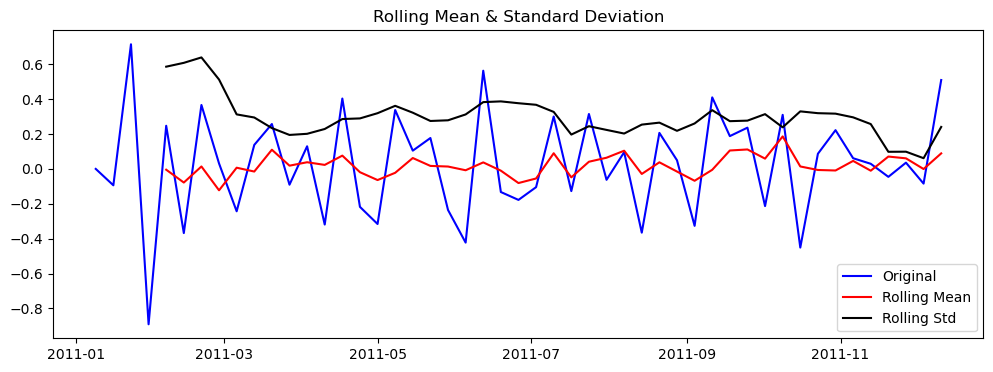

Results of Dickey-Fuller Test:
Test Statistic                -6.758330e+00
p-value                        2.834038e-09
#Lags Used                     2.000000e+00
Number of Observations Used    4.600000e+01
Critical Value (1%)           -3.581258e+00
Critical Value (5%)           -2.926785e+00
Critical Value (10%)          -2.601541e+00
dtype: float64


In [108]:
test_stationarity(df_log_diff)

<p> The test <b> statistic value</b>  is less than <b> critacal</b>  values and  a p-value is less than <b>0.05 </b>  (0)this telling that the time series is <b>stationary</b>.</p>

#### Identify The ACF and PACF For The Data

In [109]:
from statsmodels.graphics.tsaplots import acf, pacf
lag_acf = acf(df_log_diff, nlags=10)
lag_pacf = pacf(df_log_diff, nlags=10, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

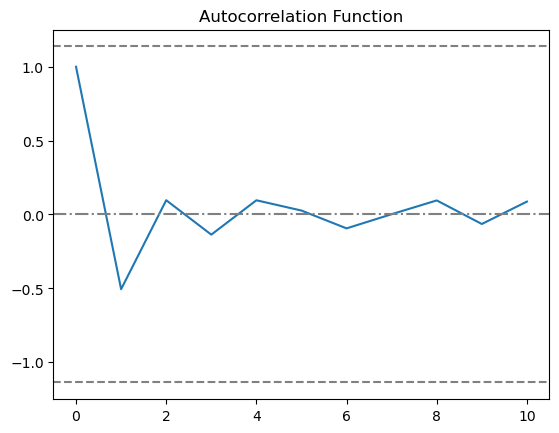

In [110]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='-.',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

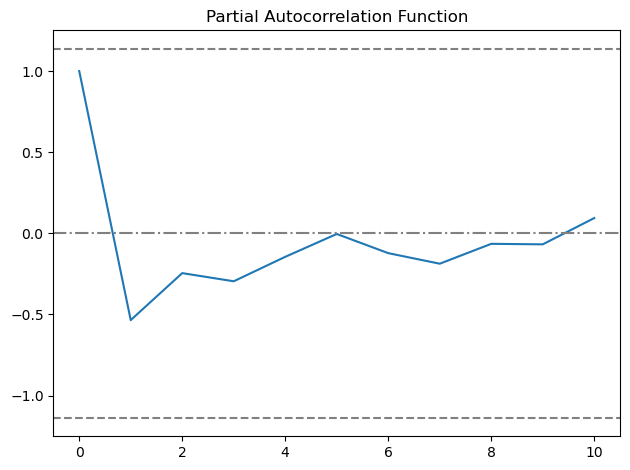

In [111]:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='-.',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

<h1 style="font-family:Palatino;color:deepskyblue;"> ARIMA Model  </h1>

In [112]:
from statsmodels.tsa.arima.model import ARIMA

In [113]:
train = df_log_diff[:35]['Quantity']
test = df_log_diff[35:]['Quantity']

In [114]:
## How to find the ideal values for p,d,q:

import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        #model = ARIMA(train, order=pdq).fit()
        model = ARIMA(df_log_diff,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)
        
        
results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])
results.sort_values("RMSE") #Least RMSE score are best hyperparamterer for (p,d,q) values

128


,RMSE
"(6, 0, 7)",0.211170
"(7, 0, 6)",0.213914
"(2, 1, 6)",0.215856
"(5, 0, 5)",0.216899
"(5, 1, 5)",0.217809
...,...
"(5, 1, 0)",0.276279
"(3, 1, 0)",0.279138
"(2, 1, 0)",0.289721
"(1, 1, 0)",0.345254


Text(0.5, 1.0, 'RSS: 2.4634')

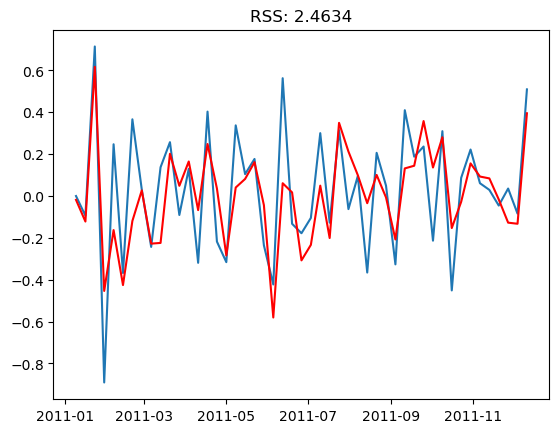

In [115]:
model = ARIMA(df_log_diff, order=(6, 0, 7))
model = model.fit()

residuals = model.resid
plt.plot(df_log_diff)
plt.plot(residuals, color='red')
plt.title('RSS: %.4f'% sum((residuals)**2))

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   49
Model:                 ARIMA(6, 0, 7)   Log Likelihood                   4.445
Date:                Wed, 17 May 2023   AIC                             21.110
Time:                        13:50:11   BIC                             49.488
Sample:                    01-09-2011   HQIC                            31.877
                         - 12-11-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0183      0.015      1.237      0.216      -0.011       0.047
ar.L1         -0.1358      1.729     -0.079      0.937      -3.526       3.254
ar.L2         -0.0534      1.492     -0.036      0.9

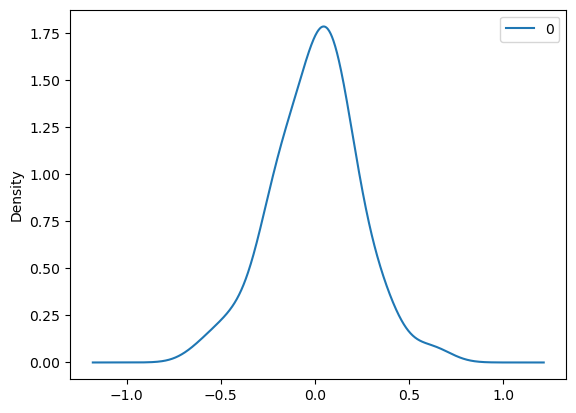

In [116]:
print(model.summary())
# plot residual errors
residuals = pd.DataFrame(model.resid)
residuals.plot(kind='kde')
print(residuals.describe())

<h1 style="font-family:Palatino;color:deepskyblue;"> Future Predictions using Arima model  </h1>

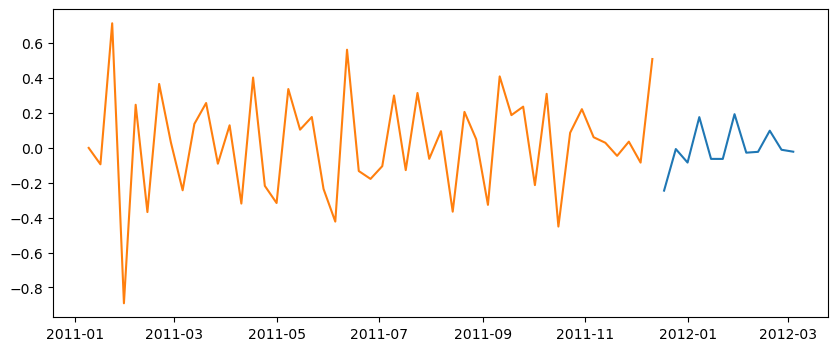

In [117]:
forecast = model.forecast(steps = 12)
plt.figure(figsize=(10,4))
plt.plot(forecast)
plt.plot(df_log_diff)
plt.show()